# Financial News Sentiment Analysis

This notebook performs comprehensive sentiment analysis on financial news articles stored in MongoDB using the FinBERT model. The analysis workflow is structured as follows:

## Workflow Overview

### Data Collection and Setup
1. **Database Connection**: Establish connection to MongoDB and retrieve news articles
2. **Model Initialization**: Load the FinBERT model for financial sentiment analysis

### Analysis Pipeline  
3. **Data Processing**: Combine article titles and content for comprehensive analysis
4. **Sentiment Classification**: Apply FinBERT to classify news sentiment (positive, negative, neutral)
5. **Results Analysis**: Examine sentiment distribution and handle processing errors

### Advanced Analytics
6. **Ticker-Based Analysis**: Group sentiment by individual stock tickers
7. **Temporal Analysis**: Examine sentiment trends over time

**Model**: [FinBERT](https://huggingface.co/yiyanghkust/finbert-tone) - A specialized BERT model fine-tuned for financial sentiment analysis, providing superior accuracy for finance-related text.

## 1. Database Connection Setup

Establish a secure connection to the MongoDB database containing our financial news articles.

In [2]:
# Import required libraries for MongoDB connection
from pymongo import MongoClient
from pymongo.server_api import ServerApi
import os
from dotenv import dotenv_values

# Load environment variables from .env file
config = dotenv_values(".env")
MONGODB_CONNECTION_STRING = config.get("CONNECTION_STRING")

# Initialize MongoDB client with server API version 1
client = MongoClient(MONGODB_CONNECTION_STRING, server_api=ServerApi('1'))

# Test the connection to verify successful setup
try:
    client.admin.command('ping')
    print("✓ Successfully connected to MongoDB")
except Exception as e:
    print(f"✗ Connection failed: {e}")

✓ Successfully connected to MongoDB


## 2. Import Required Libraries

Import the necessary libraries for sentiment analysis and data processing.

In [3]:
# MongoDB utilities for data manipulation
import pymongo
from bson.objectid import ObjectId

# Transformers library for FinBERT model implementation
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

c:\Users\peems\miniconda3\envs\homl3\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\peems\miniconda3\envs\homl3\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\peems\miniconda3\envs\homl3\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


## 3. Initialize FinBERT Model

Load the pre-trained FinBERT model specifically designed for financial sentiment analysis.

In [4]:
# Load FinBERT tokenizer and model for financial sentiment analysis
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=3)

# Create sentiment analysis pipeline with the loaded model
finbert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
print("✓ FinBERT model loaded successfully!")

c:\Users\peems\miniconda3\envs\homl3\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


✓ FinBERT model loaded successfully!


## 4. Access News Articles Database

Connect to the specific database and collection containing our financial news articles.

In [5]:
# Access the finance news database
database = client["finance_news_db"]

# Access the news articles collection
news_collection = database["numerous_articles"]

## 5. Explore the Dataset

Examine the structure and content of our news articles collection to understand the data format.

In [6]:
import pprint as pp

# Count total number of articles in our collection
total_articles = news_collection.count_documents({})
print(f"Total news articles in collection: {total_articles}")

# Display a sample document to understand the data structure
print("\nSample article structure:")
sample_article = news_collection.find_one()
pp.pprint(sample_article)

Total news articles in collection: 1272

Sample article structure:
{'_id': ObjectId('692af2e04a7fefe22f224c5f'),
 'authors': 'dgeiger@businessinsider.com (Daniel Geiger)',
 'content': 'Chad Tredway was a rising star at JPMorgan Chase before launching '
            'his own firm in 2021.\n'
            'In 2024, he returned to JPMorgan and now leads its $79 billion '
            'property investment arm.\n'
            'With stocks volatile and real estate on the rise, Tredway is '
            'trying to grab investor interest.\n'
            'Chad Tredway charted a fast path into upper management at '
            'JPMorgan Chase, rising from an associate during the Financial '
            "Crisis to a senior position overseeing the bank's $20 billion "
            'lending business with some of the largest commercial real estate '
            'landlords and developers. Business Insider featured Tredway in '
            'its first Rising Stars of Wall Street list in 2017.\n'
           

## 6. Load Data into DataFrame

Convert the MongoDB collection into a pandas DataFrame for efficient data manipulation and analysis.

In [7]:
import pandas as pd

# Convert MongoDB collection to pandas DataFrame
news_df = pd.DataFrame(list(news_collection.find()))

print(f"DataFrame shape: {news_df.shape}")
print(f"Available columns: {list(news_df.columns)}")

# Display first few rows to verify data structure
news_df.head()

DataFrame shape: (1272, 8)
Available columns: ['_id', 'title', 'publisher', 'tickers', 'link', 'authors', 'time_published', 'content']


,_id,title,publisher,tickers,link,authors,time_published,content
0,692af2e04a7fefe22f224c5f,Rising star catch-up: Chad Tredway is back at ...,Business Insider,"[{'symbol': 'JPM', 'change': None}]",https://finance.yahoo.com/news/rising-star-cat...,dgeiger@businessinsider.com (Daniel Geiger),"Sat, November 29, 2025 at 7:20 PM GMT+7",Chad Tredway was a rising star at JPMorgan Cha...
1,692af2e14a7fefe22f224c60,Want Steady Income in Retirement? These Overlo...,Investopedia,[],https://finance.yahoo.com/news/want-steady-inc...,Jonathan Ponciano,"Sat, November 29, 2025 at 7:08 PM GMT+7",Klaus Vedfelt / Getty Images\n93% of workers w...
2,692af2e24a7fefe22f224c61,The hottest new AI company is…Google?,CNN Business,[],https://finance.yahoo.com/news/hottest-ai-comp...,"Analysis by Lisa Eadicicco, CNN","Sat, November 29, 2025 at 7:01 PM GMT+7",Google just threw another twist in the fast-ch...
3,692af2e34a7fefe22f224c62,Medicare Advantage woos seniors with plan perk...,Yahoo Finance,"[{'symbol': 'HUM', 'change': None}]",https://finance.yahoo.com/news/medicare-advant...,Kerry Hannon · Senior Columnist,"Sat, November 29, 2025 at 6:57 PM GMT+7",Seniors have embraced Medicare Advantage plans...
4,692af2e44a7fefe22f224c63,Why Waiting for a Housing Crash Could Be Costi...,Investopedia,[],https://finance.yahoo.com/news/why-waiting-hou...,Isabel O'Brien,"Sat, November 29, 2025 at 6:39 PM GMT+7",Fact checked by Suzanne Kvilhaug\nDrs Producoe...


## Prepare Text for Analysis

Combine article titles and content to create a comprehensive text field for sentiment analysis.

In [8]:
# Combine title and content into a single comprehensive text field
# Handle missing values by replacing with empty strings
news_df['full_text'] = news_df['title'].fillna('') + ". " + news_df['content'].fillna('')

print("✓ Created 'full_text' column with combined title and content")
print(f"Average text length: {news_df['full_text'].str.len().mean():.0f} characters")

✓ Created 'full_text' column with combined title and content
Average text length: 2469 characters


## Define Sentiment Analysis Function

Create a robust function to handle sentiment analysis with proper error handling and text preprocessing.

In [9]:
def analyze_sentiment(text):
    """
    Analyze sentiment of financial text using FinBERT model.
    
    Args:
        text (str): Input text for sentiment analysis
        
    Returns:
        pd.Series: Contains sentiment label and confidence score
    """
    # Validate input text
    if not isinstance(text, str) or len(text) < 5:
        return pd.Series([None, 0.0], index=['sentiment_label', 'sentiment_score'])
    
    # Truncate text to prevent BERT token limit overflow (512 tokens max)
    # Approximate: 1500 characters ≈ 512 tokens
    max_chars = 1500
    processed_text = text[:max_chars]
    
    try:
        # Run FinBERT sentiment analysis
        result = finbert(processed_text)[0]
        return pd.Series([result['label'], result['score']], 
                        index=['sentiment_label', 'sentiment_score'])
    except Exception as e:
        # Log error and return error indicator for debugging
        print(f"Sentiment analysis failed: {str(e)[:100]}...")
        return pd.Series(["Error", 0.0], index=['sentiment_label', 'sentiment_score'])

## Apply Sentiment Analysis

Process all news articles through the FinBERT model to obtain sentiment classifications.

In [10]:
# Apply sentiment analysis to all articles using our custom function
news_df[['sentiment_label', 'sentiment_score']] = news_df['full_text'].apply(analyze_sentiment)
print("✓ Sentiment analysis completed for all articles")

Sentiment analysis failed: The size of tensor a (612) must match the size of tensor b (512) at non-singleton dimension 1...
Sentiment analysis failed: The size of tensor a (561) must match the size of tensor b (512) at non-singleton dimension 1...
Sentiment analysis failed: The size of tensor a (636) must match the size of tensor b (512) at non-singleton dimension 1...
Sentiment analysis failed: The size of tensor a (636) must match the size of tensor b (512) at non-singleton dimension 1...
Sentiment analysis failed: The size of tensor a (690) must match the size of tensor b (512) at non-singleton dimension 1...
Sentiment analysis failed: The size of tensor a (641) must match the size of tensor b (512) at non-singleton dimension 1...
Sentiment analysis failed: The size of tensor a (690) must match the size of tensor b (512) at non-singleton dimension 1...
Sentiment analysis failed: The size of tensor a (641) must match the size of tensor b (512) at non-singleton dimension 1...
Sentimen

## Analyze Sentiment Distribution

Examine the overall distribution of sentiment classifications across all news articles.

In [11]:
# Display overall sentiment classification results
print("Sentiment Classification Results:")
print("=" * 40)

# Count occurrences of each sentiment
sentiment_counts = news_df['sentiment_label'].value_counts()
print(sentiment_counts)

# Calculate and display percentages
print("\nSentiment Distribution (%):")
sentiment_percentages = news_df['sentiment_label'].value_counts(normalize=True) * 100
for label, percentage in sentiment_percentages.items():
    print(f"{label}: {percentage:.1f}%")

Sentiment Classification Results:
sentiment_label
Neutral     575
Positive    427
Negative    252
Error        18
Name: count, dtype: int64

Sentiment Distribution (%):
Neutral: 45.2%
Positive: 33.6%
Negative: 19.8%
Error: 1.4%


## Error Analysis

Examine any articles that couldn't be processed to understand and troubleshoot potential issues.

In [12]:
# Identify articles that resulted in processing errors
error_articles = news_df[news_df['sentiment_label'] == 'Error']
print(f"Articles with processing errors: {len(error_articles)}")

Articles with processing errors: 18


In [13]:
# Display error articles for inspection
error_articles.head()

,_id,title,publisher,tickers,link,authors,time_published,content,full_text,sentiment_label,sentiment_score
74,692af32b4a7fefe22f224ca9,BC-OILS,Associated Press Finance,"[{'symbol': 'CL=F', 'change': None}]",https://finance.yahoo.com/news/bc-oils-2000194...,The Associated Press,"Sat, November 29, 2025 at 3:00 AM GMT+7",NEW YORK (AP) — Futures trading on the New Yor...,BC-OILS. NEW YORK (AP) — Futures trading on th...,Error,0.0
75,692af32d4a7fefe22f224caa,BC-Gold-Silver,Associated Press Finance,[],https://finance.yahoo.com/news/bc-gold-silver-...,The Associated Press,"Sat, November 29, 2025 at 3:00 AM GMT+7",NEW YORK (AP) — Futures trading on the NY Merc...,BC-Gold-Silver. NEW YORK (AP) — Futures tradin...,Error,0.0
136,692af36f4a7fefe22f224ce7,BC-Most Active Stocks,Associated Press Finance,"[{'symbol': 'KTTA', 'change': None}, {'symbol'...",https://finance.yahoo.com/news/bc-most-active-...,The Associated Press,"Fri, November 28, 2025 at 10:30 PM GMT+7",NEW YORK (AP) — prices for the Nasdaq composit...,BC-Most Active Stocks. NEW YORK (AP) — prices ...,Error,0.0
147,692af37c4a7fefe22f224cf2,BC-BOT-Table,Associated Press Finance,"[{'symbol': 'ZW=F', 'change': '+0.38%'}, {'sym...",https://finance.yahoo.com/news/bc-bot-table-15...,The Associated Press,"Fri, November 28, 2025 at 10:00 PM GMT+7",CHICAGO (AP) — Futures trading on the Chicago ...,BC-BOT-Table. CHICAGO (AP) — Futures trading o...,Error,0.0
148,692af37d4a7fefe22f224cf3,BC-US-Foreign Exchange,Associated Press Finance,"[{'symbol': 'BRL=X', 'change': '-0.37%'}, {'sy...",https://finance.yahoo.com/news/bc-us-foreign-e...,The Associated Press,"Fri, November 28, 2025 at 10:00 PM GMT+7","NEW YORK (AP) — Foreign Exchange, New York pri...",BC-US-Foreign Exchange. NEW YORK (AP) — Foreig...,Error,0.0


### Detailed Error Investigation

Examine problematic articles in detail to understand what caused processing failures.

In [14]:
# Perform detailed analysis of problematic articles
error_articles = news_df[news_df['sentiment_label'] == 'Error']

if len(error_articles) > 0:
    print("Detailed Error Analysis:")
    print("=" * 50)
    
    for idx, row in error_articles.iterrows():
        article_text = row['full_text']
        print(f"\nArticle Index: {idx}")
        print(f"Text Length: {len(article_text)} characters")
        print(f"Text Type: {type(article_text)}")
        print(f"Text Preview: '{article_text}...'")
        print("-" * 30)
else:
    print("✓ No errors detected - all articles processed successfully!")

Detailed Error Analysis:

Article Index: 74
Text Length: 3369 characters
Text Type: <class 'str'>
Text Preview: 'BC-OILS. NEW YORK (AP) — Futures trading on the New York Mercantile Exchange Friday:
Open
High
Low
Settle
Chg.
Jan 26
58.58
59.64
58.27
58.55
-.10
Feb 26
58.33
59.34
58.02
58.29
-.13
Mar 26
58.18
59.12
57.83
58.09
-.17
Apr 26
58.14
59.01
57.73
58.00
-.20
May 26
58.12
59.00
57.80
58.01
-.22
Jun 26
59.05
57.81
58.06
-.24
Jul 26
58.31
57.98
58.11
-.25
Aug 26
58.39
59.09
57.97
58.10
-.28
Sep 26
58.22
58.07
-.30
Oct 26
58.67
58.93
57.89
58.03
-.32
Nov 26
58.23
58.92
57.88
-.34
Dec 26
57.84
58.05
-.35
Jan 27
-.37
Feb 27
-.38
Mar 27
58.13
Apr 27
May 27
58.34
-.39
Jun 27
58.61
59.30
58.46
Jul 27
Aug 27
58.64
Sep 27
58.73
-.40
Oct 27
58.84
-.41
Nov 27
58.99
Dec 27
59.41
59.94
58.96
59.13
Jan 28
59.22
Feb 28
59.31
Mar 28
59.42
Apr 28
59.54
May 28
59.69
Jun 28
60.07
59.83
Jul 28
59.91
Aug 28
60.00
Sep 28
60.13
Oct 28
60.26
Nov 28
60.41
Dec 28
60.75
61.16
60.42
60.54
Jan 29
60.62
Feb 29

In [15]:
# Display processed DataFrame with sentiment results
news_df.head()

,_id,title,publisher,tickers,link,authors,time_published,content,full_text,sentiment_label,sentiment_score
0,692af2e04a7fefe22f224c5f,Rising star catch-up: Chad Tredway is back at ...,Business Insider,"[{'symbol': 'JPM', 'change': None}]",https://finance.yahoo.com/news/rising-star-cat...,dgeiger@businessinsider.com (Daniel Geiger),"Sat, November 29, 2025 at 7:20 PM GMT+7",Chad Tredway was a rising star at JPMorgan Cha...,Rising star catch-up: Chad Tredway is back at ...,Neutral,0.999986
1,692af2e14a7fefe22f224c60,Want Steady Income in Retirement? These Overlo...,Investopedia,[],https://finance.yahoo.com/news/want-steady-inc...,Jonathan Ponciano,"Sat, November 29, 2025 at 7:08 PM GMT+7",Klaus Vedfelt / Getty Images\n93% of workers w...,Want Steady Income in Retirement? These Overlo...,Neutral,0.999928
2,692af2e24a7fefe22f224c61,The hottest new AI company is…Google?,CNN Business,[],https://finance.yahoo.com/news/hottest-ai-comp...,"Analysis by Lisa Eadicicco, CNN","Sat, November 29, 2025 at 7:01 PM GMT+7",Google just threw another twist in the fast-ch...,The hottest new AI company is…Google?. Google ...,Positive,0.993410
3,692af2e34a7fefe22f224c62,Medicare Advantage woos seniors with plan perk...,Yahoo Finance,"[{'symbol': 'HUM', 'change': None}]",https://finance.yahoo.com/news/medicare-advant...,Kerry Hannon · Senior Columnist,"Sat, November 29, 2025 at 6:57 PM GMT+7",Seniors have embraced Medicare Advantage plans...,Medicare Advantage woos seniors with plan perk...,Neutral,0.999997
4,692af2e44a7fefe22f224c63,Why Waiting for a Housing Crash Could Be Costi...,Investopedia,[],https://finance.yahoo.com/news/why-waiting-hou...,Isabel O'Brien,"Sat, November 29, 2025 at 6:39 PM GMT+7",Fact checked by Suzanne Kvilhaug\nDrs Producoe...,Why Waiting for a Housing Crash Could Be Costi...,Neutral,0.998698


## Sentiment Analysis by Ticker Symbol

Analyze sentiment distribution grouped by individual stock ticker symbols to understand market sentiment for specific stocks.

In [16]:
# Create expanded dataset with one row per ticker mention
# This allows analysis of sentiment for individual stocks
ticker_sentiment_records = []

for idx, row in news_df.iterrows():
    # Skip articles with sentiment analysis errors
    if row['sentiment_label'] == 'Error' or pd.isna(row['sentiment_label']):
        continue
    
    # Process articles with specific ticker information
    if row['tickers'] and len(row['tickers']) > 0:
        for ticker_info in row['tickers']:
            ticker_symbol = ticker_info.get('symbol', 'Unknown')
            ticker_sentiment_records.append({
                'ticker': ticker_symbol,
                'sentiment_label': row['sentiment_label'],
                'sentiment_score': row['sentiment_score'],
                'title': row['title'],
                'publisher': row['publisher'],
                'time_published': row['time_published']
            })
    else:
        # Articles without specific tickers - categorize as general market news
        ticker_sentiment_records.append({
            'ticker': 'General Market',
            'sentiment_label': row['sentiment_label'],
            'sentiment_score': row['sentiment_score'],
            'title': row['title'],
            'publisher': row['publisher'],
            'time_published': row['time_published']
        })

# Create expanded DataFrame for ticker-based analysis
ticker_sentiment_df = pd.DataFrame(ticker_sentiment_records)

print(f"Expanded DataFrame shape: {ticker_sentiment_df.shape}")
print(f"Total ticker mentions: {len(ticker_sentiment_df)}")
print(f"Unique tickers analyzed: {ticker_sentiment_df['ticker'].nunique()}")

Expanded DataFrame shape: (1735, 6)
Total ticker mentions: 1735
Unique tickers analyzed: 645


In [17]:
# Group by ticker and sentiment to create summary statistics
sentiment_by_ticker = ticker_sentiment_df.groupby(['ticker', 'sentiment_label']).size().unstack(fill_value=0)

# Calculate total mentions and sort by popularity
sentiment_by_ticker['total_mentions'] = sentiment_by_ticker.sum(axis=1)
sentiment_by_ticker = sentiment_by_ticker.sort_values('total_mentions', ascending=False)

print("Sentiment Distribution by Ticker (Top 20 most mentioned):")
print("=" * 70)
print(sentiment_by_ticker.head(20))

Sentiment Distribution by Ticker (Top 20 most mentioned):
sentiment_label  Negative  Neutral  Positive  total_mentions
ticker                                                      
General Market         49      229        51             329
BTC-USD                33       40        16              89
^GSPC                  16       14        23              53
CL=F                   14       15         5              34
NVDA                    2       18        10              30
MSTR                    7       11         4              22
GC=F                    5        8         7              20
AMZN                    1       13         5              19
ETH-USD                 3        9         5              17
GOOG                    2        8         7              17
^IXIC                   4        4         8              16
^DJI                    3        2        10              15
TSLA                    4        8         3              15
DX-Y.NYB                6  

In [18]:
def create_detailed_sentiment_analysis(min_mentions=5):
    """
    Create comprehensive sentiment analysis for tickers with sufficient mentions.
    
    Args:
        min_mentions (int): Minimum number of mentions required for analysis
        
    Returns:
        pd.DataFrame: Detailed sentiment analysis with counts and percentages
    """
    # Filter tickers with sufficient mentions for meaningful analysis
    filtered_tickers = sentiment_by_ticker[sentiment_by_ticker['total_mentions'] >= min_mentions].copy()
    
    # Calculate percentage distributions
    sentiment_categories = ['Negative', 'Neutral', 'Positive']
    for category in sentiment_categories:
        if category in filtered_tickers.columns:
            column_name = f'{category}_pct'
            filtered_tickers[column_name] = (
                filtered_tickers[category] / filtered_tickers['total_mentions'] * 100
            ).round(1)
    
    # Select relevant columns for final analysis
    summary_columns = ['Negative', 'Neutral', 'Positive', 'total_mentions', 
                      'Negative_pct', 'Neutral_pct', 'Positive_pct']
    available_columns = [col for col in summary_columns if col in filtered_tickers.columns]
    
    return filtered_tickers[available_columns]

# Generate detailed analysis for tickers with 5+ mentions
detailed_ticker_analysis = create_detailed_sentiment_analysis(min_mentions=5)

print("Detailed Sentiment Analysis (Tickers with 5+ mentions):")
print("=" * 80)
print(detailed_ticker_analysis)

Detailed Sentiment Analysis (Tickers with 5+ mentions):
sentiment_label  Negative  Neutral  Positive  total_mentions  Negative_pct  \
ticker                                                                       
General Market         49      229        51             329          14.9   
BTC-USD                33       40        16              89          37.1   
^GSPC                  16       14        23              53          30.2   
CL=F                   14       15         5              34          41.2   
NVDA                    2       18        10              30           6.7   
MSTR                    7       11         4              22          31.8   
GC=F                    5        8         7              20          25.0   
AMZN                    1       13         5              19           5.3   
ETH-USD                 3        9         5              17          17.6   
GOOG                    2        8         7              17          11.8   
^IXIC   

In [19]:
# Generate key insights from ticker sentiment analysis
print("KEY INSIGHTS - TICKER SENTIMENT ANALYSIS")
print("=" * 60)

# 1. Most mentioned tickers
top_mentioned_tickers = detailed_ticker_analysis.head(10)
print("\n1. MOST MENTIONED TICKERS:")
for ticker, row in top_mentioned_tickers.iterrows():
    pos_pct = row.get('Positive_pct', 0)
    neu_pct = row.get('Neutral_pct', 0) 
    neg_pct = row.get('Negative_pct', 0)
    total = row.get('total_mentions', 0)
    print(f"   {ticker}: {total} mentions - Positive: {pos_pct}% | Neutral: {neu_pct}% | Negative: {neg_pct}%")

# 2. Most positive sentiment tickers
min_mentions_filter = detailed_ticker_analysis['total_mentions'] >= 5
most_positive_tickers = detailed_ticker_analysis[min_mentions_filter].sort_values('Positive_pct', ascending=False).head(10)
print("\n2. MOST POSITIVE SENTIMENT TICKERS (5+ mentions):")
for ticker, row in most_positive_tickers.iterrows():
    pos_pct = row.get('Positive_pct', 0)
    pos_count = row.get('Positive', 0)
    total = row.get('total_mentions', 0)
    print(f"   {ticker}: {pos_pct}% positive ({pos_count}/{total} articles)")

# 3. Most negative sentiment tickers  
most_negative_tickers = detailed_ticker_analysis[min_mentions_filter].sort_values('Negative_pct', ascending=False).head(10)
print("\n3. MOST NEGATIVE SENTIMENT TICKERS (5+ mentions):")
for ticker, row in most_negative_tickers.iterrows():
    neg_pct = row.get('Negative_pct', 0)
    neg_count = row.get('Negative', 0)
    total = row.get('total_mentions', 0)
    print(f"   {ticker}: {neg_pct}% negative ({neg_count}/{total} articles)")

# 4. Overall statistics
print(f"\n4. OVERALL STATISTICS:")
print(f"   Total unique tickers analyzed: {len(sentiment_by_ticker)}")
print(f"   Tickers with 5+ mentions: {len(detailed_ticker_analysis)}")
print(f"   Tickers with 10+ mentions: {len(detailed_ticker_analysis[detailed_ticker_analysis['total_mentions'] >= 10])}")
print(f"   Total sentiment analyses: {sentiment_by_ticker['total_mentions'].sum()}")

KEY INSIGHTS - TICKER SENTIMENT ANALYSIS

1. MOST MENTIONED TICKERS:
   General Market: 329.0 mentions - Positive: 15.5% | Neutral: 69.6% | Negative: 14.9%
   BTC-USD: 89.0 mentions - Positive: 18.0% | Neutral: 44.9% | Negative: 37.1%
   ^GSPC: 53.0 mentions - Positive: 43.4% | Neutral: 26.4% | Negative: 30.2%
   CL=F: 34.0 mentions - Positive: 14.7% | Neutral: 44.1% | Negative: 41.2%
   NVDA: 30.0 mentions - Positive: 33.3% | Neutral: 60.0% | Negative: 6.7%
   MSTR: 22.0 mentions - Positive: 18.2% | Neutral: 50.0% | Negative: 31.8%
   GC=F: 20.0 mentions - Positive: 35.0% | Neutral: 40.0% | Negative: 25.0%
   AMZN: 19.0 mentions - Positive: 26.3% | Neutral: 68.4% | Negative: 5.3%
   ETH-USD: 17.0 mentions - Positive: 29.4% | Neutral: 52.9% | Negative: 17.6%
   GOOG: 17.0 mentions - Positive: 41.2% | Neutral: 47.1% | Negative: 11.8%

2. MOST POSITIVE SENTIMENT TICKERS (5+ mentions):
   MDB: 100.0% positive (8.0/8.0 articles)
   BA: 87.5% positive (7.0/8.0 articles)
   SI=F: 75.0% posit

In [20]:
# Create comprehensive summary table for export and further analysis
ticker_sentiment_summary = sentiment_by_ticker.copy()

# Add percentage columns for each sentiment category
sentiment_categories = ['Negative', 'Neutral', 'Positive']
for category in sentiment_categories:
    if category in ticker_sentiment_summary.columns:
        percentage_column = f'{category}_pct'
        ticker_sentiment_summary[percentage_column] = (
            ticker_sentiment_summary[category] / ticker_sentiment_summary['total_mentions'] * 100
        ).round(1)

# Reset index to make ticker a regular column
ticker_sentiment_summary = ticker_sentiment_summary.reset_index()

# Organize columns for optimal readability
preferred_column_order = [
    'ticker', 'total_mentions', 
    'Positive', 'Positive_pct', 
    'Neutral', 'Neutral_pct', 
    'Negative', 'Negative_pct'
]
available_columns = [col for col in preferred_column_order if col in ticker_sentiment_summary.columns]
ticker_sentiment_summary = ticker_sentiment_summary[available_columns]

print("TICKER SENTIMENT SUMMARY TABLE")
print("=" * 80)
print(f"Dataset shape: {ticker_sentiment_summary.shape}")
print("\nTop 15 tickers (sorted by total mentions):")
print(ticker_sentiment_summary.head(15).to_string(index=False))


TICKER SENTIMENT SUMMARY TABLE
Dataset shape: (645, 8)

Top 15 tickers (sorted by total mentions):
        ticker  total_mentions  Positive  Positive_pct  Neutral  Neutral_pct  Negative  Negative_pct
General Market             329        51          15.5      229         69.6        49          14.9
       BTC-USD              89        16          18.0       40         44.9        33          37.1
         ^GSPC              53        23          43.4       14         26.4        16          30.2
          CL=F              34         5          14.7       15         44.1        14          41.2
          NVDA              30        10          33.3       18         60.0         2           6.7
          MSTR              22         4          18.2       11         50.0         7          31.8
          GC=F              20         7          35.0        8         40.0         5          25.0
          AMZN              19         5          26.3       13         68.4         1       

## Analysis Summary

**Key Findings:**
- Successfully processed financial news articles using FinBERT for accurate sentiment classification
- Robust error handling ensures reliable processing even with problematic text data
- Ticker-based analysis provides actionable insights into market sentiment for specific stocks
- Results can be exported for further analysis, visualization, or integration into trading strategies

**Next Steps:**
- Consider temporal analysis to identify sentiment trends over time
- Implement sentiment score weighting based on article importance or publisher credibility
- Explore correlation between sentiment patterns and actual stock price movements

## Temporal Analysis - General Market Sentiment Trends

Create time series visualization to analyze how general market sentiment evolves over time.

In [21]:
# Import required libraries for time series analysis and visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Filter data for General Market sentiment analysis
general_market_sentiment = ticker_sentiment_df[ticker_sentiment_df['ticker'] == 'General Market'].copy()

print(f"General Market articles: {len(general_market_sentiment)}")
print(f"\nTime publication data overview:")
print(f"Sample time_published values:")
print(general_market_sentiment['time_published'].head())
print(f"Data type: {type(general_market_sentiment['time_published'].iloc[0])}")

# Display sample time format for parsing reference
general_market_sentiment['time_published'].head(10)

General Market articles: 329

Time publication data overview:
Sample time_published values:
1    Sat, November 29, 2025 at 7:08 PM GMT+7
2    Sat, November 29, 2025 at 7:01 PM GMT+7
4    Sat, November 29, 2025 at 6:39 PM GMT+7
5    Sat, November 29, 2025 at 6:32 PM GMT+7
9    Sat, November 29, 2025 at 6:00 PM GMT+7
Name: time_published, dtype: object
Data type: <class 'str'>


1     Sat, November 29, 2025 at 7:08 PM GMT+7
2     Sat, November 29, 2025 at 7:01 PM GMT+7
4     Sat, November 29, 2025 at 6:39 PM GMT+7
5     Sat, November 29, 2025 at 6:32 PM GMT+7
9     Sat, November 29, 2025 at 6:00 PM GMT+7
11    Sat, November 29, 2025 at 6:00 PM GMT+7
12    Sat, November 29, 2025 at 6:00 PM GMT+7
15    Sat, November 29, 2025 at 6:00 PM GMT+7
16    Sat, November 29, 2025 at 6:00 PM GMT+7
19    Sat, November 29, 2025 at 5:22 PM GMT+7
Name: time_published, dtype: object

In [22]:
# Parse date strings into standardized datetime format
def parse_publication_date(date_string):
    """
    Parse publication date string into datetime object.
    
    Args:
        date_string (str): Date in format "Sat, November 29, 2025 at 7:08 PM GMT+7"
        
    Returns:
        datetime: Parsed datetime object or None if parsing fails
    """
    try:
        # Split date and time components
        # Format: "Sat, November 29, 2025 at 7:08 PM GMT+7"
        date_component = date_string.split(' at ')[0]  # "Sat, November 29, 2025"
        time_component = date_string.split(' at ')[1].split(' GMT')[0]  # "7:08 PM"
        
        # Combine components for parsing
        datetime_string = f"{date_component} {time_component}"
        return pd.to_datetime(datetime_string, format='%a, %B %d, %Y %I:%M %p')
    except Exception:
        return None

# Apply date parsing to general market data
general_market_sentiment['parsed_date'] = general_market_sentiment['time_published'].apply(parse_publication_date)

# Remove articles where date parsing failed
general_market_sentiment = general_market_sentiment[general_market_sentiment['parsed_date'].notna()]

print(f"Successfully parsed dates for {len(general_market_sentiment)} articles")
print(f"Date range: {general_market_sentiment['parsed_date'].min()} to {general_market_sentiment['parsed_date'].max()}")

# Display parsed results for verification
general_market_sentiment[['time_published', 'parsed_date']].head()

Successfully parsed dates for 115 articles
Date range: 2025-11-28 21:00:00 to 2025-12-03 03:58:00


,time_published,parsed_date
1,"Sat, November 29, 2025 at 7:08 PM GMT+7",2025-11-29 19:08:00
2,"Sat, November 29, 2025 at 7:01 PM GMT+7",2025-11-29 19:01:00
4,"Sat, November 29, 2025 at 6:39 PM GMT+7",2025-11-29 18:39:00
5,"Sat, November 29, 2025 at 6:32 PM GMT+7",2025-11-29 18:32:00
9,"Sat, November 29, 2025 at 6:00 PM GMT+7",2025-11-29 18:00:00


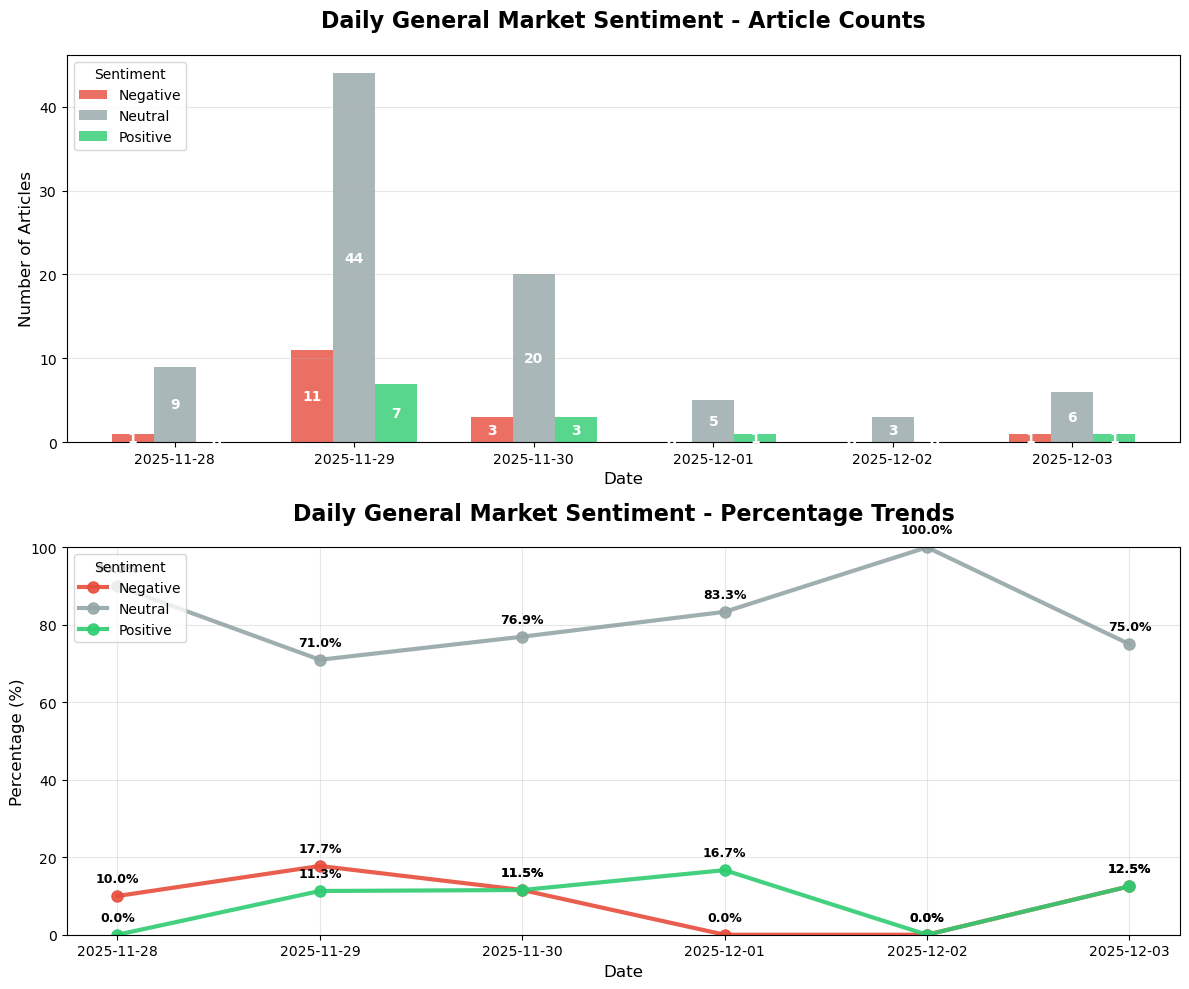

DAILY SENTIMENT ANALYSIS SUMMARY
Analysis period: 2025-11-28 to 2025-12-03
Total articles analyzed: 115
Days covered: 6

DAILY BREAKDOWN:
   2025-11-28: 10 articles → Positive: 0.0% | Neutral: 90.0% | Negative: 10.0%
   2025-11-29: 62 articles → Positive: 11.3% | Neutral: 71.0% | Negative: 17.7%
   2025-11-30: 26 articles → Positive: 11.5% | Neutral: 76.9% | Negative: 11.5%
   2025-12-01: 6 articles → Positive: 16.7% | Neutral: 83.3% | Negative: 0.0%
   2025-12-02: 3 articles → Positive: 0.0% | Neutral: 100.0% | Negative: 0.0%
   2025-12-03: 8 articles → Positive: 12.5% | Neutral: 75.0% | Negative: 12.5%


In [23]:
# Create comprehensive daily sentiment visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Prepare daily sentiment aggregation
general_market_sentiment['date'] = general_market_sentiment['parsed_date'].dt.date
daily_sentiment_counts = general_market_sentiment.groupby(['date', 'sentiment_label']).size().unstack(fill_value=0)

# Define consistent color scheme
SENTIMENT_COLORS = {
    'Negative': '#e74c3c',  # Red
    'Neutral': '#95a5a6',   # Gray  
    'Positive': '#2ecc71'   # Green
}

# Chart 1: Daily article counts as stacked bar chart
daily_sentiment_counts.plot(
    kind='bar', 
    ax=ax1,
    color=[SENTIMENT_COLORS.get(col, '#bdc3c7') for col in daily_sentiment_counts.columns],
    alpha=0.8, 
    width=0.7
)

ax1.set_title('Daily General Market Sentiment - Article Counts', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Number of Articles', fontsize=12)
ax1.legend(title='Sentiment', loc='upper left')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars for clarity
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fontweight='bold', color='white')

# Chart 2: Daily sentiment percentages as line chart
daily_sentiment_percentages = daily_sentiment_counts.div(daily_sentiment_counts.sum(axis=1), axis=0) * 100

# Create line plot with markers for trend analysis
for sentiment_category in daily_sentiment_percentages.columns:
    if sentiment_category in SENTIMENT_COLORS:
        ax2.plot(
            range(len(daily_sentiment_percentages)), 
            daily_sentiment_percentages[sentiment_category],
            marker='o', 
            linewidth=3, 
            markersize=8, 
            label=sentiment_category,
            color=SENTIMENT_COLORS[sentiment_category], 
            alpha=0.9
        )

# Format percentage chart
ax2.set_title('Daily General Market Sentiment - Percentage Trends', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend(title='Sentiment', loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

# Configure x-axis with actual dates
date_labels = [str(date) for date in daily_sentiment_percentages.index]
ax2.set_xticks(range(len(date_labels)))
ax2.set_xticklabels(date_labels, rotation=0)

# Add percentage annotations on data points
for sentiment_category in daily_sentiment_percentages.columns:
    if sentiment_category in SENTIMENT_COLORS:
        for i, percentage_value in enumerate(daily_sentiment_percentages[sentiment_category]):
            ax2.annotate(
                f'{percentage_value:.1f}%',
                (i, percentage_value),
                textcoords="offset points",
                xytext=(0, 10),
                ha='center',
                fontsize=9,
                fontweight='bold'
            )

plt.tight_layout()
plt.show()

# Generate comprehensive summary statistics
print("DAILY SENTIMENT ANALYSIS SUMMARY")
print("=" * 50)
print(f"Analysis period: {general_market_sentiment['date'].min()} to {general_market_sentiment['date'].max()}")
print(f"Total articles analyzed: {len(general_market_sentiment)}")
print(f"Days covered: {len(daily_sentiment_counts)}")

print(f"\nDAILY BREAKDOWN:")
for date, row in daily_sentiment_counts.iterrows():
    total_articles = row.sum()
    
    # Calculate percentages safely
    positive_pct = (row.get('Positive', 0) / total_articles * 100) if total_articles > 0 else 0
    neutral_pct = (row.get('Neutral', 0) / total_articles * 100) if total_articles > 0 else 0
    negative_pct = (row.get('Negative', 0) / total_articles * 100) if total_articles > 0 else 0
    
    print(f"   {date}: {total_articles} articles → "
          f"Positive: {positive_pct:.1f}% | Neutral: {neutral_pct:.1f}% | Negative: {negative_pct:.1f}%")